# EDA and Cleaning

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn import metrics
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

In [87]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
sample_sub = pd.read_csv('../datasets/sample_sub_reg.csv')

In [88]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [89]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,NaN,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [90]:
sample_sub.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


In [91]:
train.shape

(2051, 81)

## EDA & Cleaning for 1st Predictions

I'm going to pick 10 variables as a starting point, clean those and then build my first model, and evaluate from there. I'll also change my columns to lowercase and snakecase.

In [93]:
def snake_case_lower(column):
    return column.lower().replace(' ', '_')

In [94]:
train.columns = [snake_case_lower(col) for col in train.columns]

In [95]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [96]:
test.columns = [snake_case_lower(col) for col in test.columns]

In [97]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,NaN,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [98]:
# printing out all colulmn info for train data
#train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [99]:
# printing out all colulmn info for test data
#test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

In [100]:
# First 10 chosen based on what I personally believe to be important factors to see if we can beat the baseline score 
# lot_area, housestyle, overallqual, year_built, centralair, fullbath, halfbath, bedroom, kitchenqual, yr_sold

In [101]:
first10train = train[['id', 'lot_area', 'house_style', 'overall_qual', 'year_built', 'central_air', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_qual', 'yr_sold', 'saleprice']]
first10test = test[['id', 'lot_area', 'house_style', 'overall_qual', 'year_built', 'central_air', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_qual', 'yr_sold']]

In [102]:
first10train.head()

,id,lot_area,house_style,overall_qual,year_built,central_air,full_bath,half_bath,bedroom_abvgr,kitchen_qual,yr_sold,saleprice
0,109,13517,2Story,6,1976,Y,2,1,3,Gd,2010,130500
1,544,11492,2Story,7,1996,Y,2,1,4,Gd,2009,220000
2,153,7922,1Story,5,1953,Y,1,0,3,Gd,2010,109000
3,318,9802,2Story,5,2006,Y,2,1,3,TA,2010,174000
4,255,14235,1.5Fin,6,1900,Y,2,0,3,TA,2010,138500


In [103]:
first10train.isna().sum()

No null values in my first 10 chosen variables

In [104]:
first10test.isna().sum()

In [105]:
first10train.dtypes

It looks like I should change my central_air column to a 0/1 format. I have a few ordinal variables here too, being overall_qual and kitchen qual.

In [106]:
first10test.dtypes

In [107]:
first10train.describe()

,id,lot_area,overall_qual,year_built,full_bath,half_bath,bedroom_abvgr,yr_sold,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,10065.208191,6.112140,1971.708922,1.577279,0.371039,2.843491,2007.775719,181469.701609
std,843.980841,6742.488909,1.426271,30.177889,0.549279,0.501043,0.826618,1.312014,79258.659352
min,1.000000,1300.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,2006.000000,12789.000000
25%,753.500000,7500.000000,5.000000,1953.500000,1.000000,0.000000,2.000000,2007.000000,129825.000000
50%,1486.000000,9430.000000,6.000000,1974.000000,2.000000,0.000000,3.000000,2008.000000,162500.000000
75%,2198.000000,11513.500000,7.000000,2001.000000,2.000000,1.000000,3.000000,2009.000000,214000.000000
max,2930.000000,159000.000000,10.000000,2010.000000,4.000000,2.000000,8.000000,2010.000000,611657.000000


Most of the above data seems to be reasonable, with the exception of 0 as a minimum for full_bath and bedroom_abvgr. After some digging I saw that houses without full baths did have half baths, and the bedroom_abvgr shows number of bedrooms above ground, so it's possible that they have a basement bedroom. I'll keep the data.

In [108]:
first10test.describe()

,id,lot_area,overall_qual,year_built,full_bath,half_bath,bedroom_abvgr,yr_sold
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,10307.033030,6.050114,1970.492027,1.539863,0.398633,2.879271,2007.825740
std,850.838263,10002.674602,1.369065,30.395895,0.559060,0.505927,0.830712,1.327861
min,2.000000,1477.000000,2.000000,1880.000000,0.000000,0.000000,0.000000,2006.000000
25%,692.250000,7297.250000,5.000000,1954.000000,1.000000,0.000000,2.000000,2007.000000
50%,1433.000000,9446.000000,6.000000,1972.000000,2.000000,0.000000,3.000000,2008.000000
75%,2197.500000,11589.000000,7.000000,1999.750000,2.000000,1.000000,3.000000,2009.000000
max,2928.000000,215245.000000,10.000000,2010.000000,4.000000,2.000000,6.000000,2010.000000


In [109]:
first10train['house_style'].value_counts()

house_style
1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: count, dtype: int64

In [110]:
first10test['house_style'].value_counts()

house_style
1Story    422
2Story    274
1.5Fin     96
SLvl       34
SFoyer     33
2.5Unf     10
1.5Unf      7
2.5Fin      2
Name: count, dtype: int64

In [111]:
first10train['central_air'].value_counts()

central_air
Y    1910
N     141
Name: count, dtype: int64

In [112]:
first10test['central_air'].value_counts()

central_air
Y    823
N     55
Name: count, dtype: int64

In [113]:
first10train['kitchen_qual'].value_counts()

kitchen_qual
TA    1047
Gd     806
Ex     151
Fa      47
Name: count, dtype: int64

In [114]:
first10test['kitchen_qual'].value_counts()

kitchen_qual
TA    447
Gd    354
Ex     53
Fa     23
Po      1
Name: count, dtype: int64

All my object columns appear to have proper values, but my test data kitchen quality column has 1 value that doesn't match with the train set, so I'm going to bump the value from poor to fair.

In [115]:
first10test['kitchen_qual'] = first10test['kitchen_qual'].replace('Po', 'Fa')

C:\Users\rockm\AppData\Local\Temp\ipykernel_21036\2313689135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first10test['kitchen_qual'] = first10test['kitchen_qual'].replace('Po', 'Fa')


In [116]:
first10test['kitchen_qual'].value_counts()

kitchen_qual
TA    447
Gd    354
Ex     53
Fa     24
Name: count, dtype: int64

In [117]:
first10train.to_csv('../datasets/train_cols_cleaned_01.csv', index=False)

In [118]:
first10test.to_csv('../datasets/test_cols_cleaned_01.csv', index=False)

## EDA & Cleaning for 2nd Predictions

In [119]:
train_object_cols = train.select_dtypes(include=['object'])

In [120]:
test_object_cols = test.select_dtypes(include=['object'])

In [121]:
train_object_cols.head()

,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NaN,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,NaN,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD


Adding back my sale price column to my categorical dataframe for use in my ANOVA tests

In [122]:
train_object_cols['saleprice'] = train['saleprice']

In [123]:
def anova(df):
    results = {}
    saleprice = df.columns[-1]
    
    for col in df.columns[:-1]:
        groups = df.groupby(col)[saleprice].apply(list)
        f_value, p_value = stats.f_oneway(*groups)
        results[col] = {'F-Value': f_value, 'P-Value': p_value}
    return results

In [124]:
anova(train_object_cols)

{'ms_zoning': {'F-Value': 42.46657889196625, 'P-Value': 4.706623428740341e-49},
 'street': {'F-Value': 10.04365937880734, 'P-Value': 0.0015512882730566023},
 'alley': {'F-Value': 59.72866999276367, 'P-Value': 2.0282028892775718e-12},
 'lot_shape': {'F-Value': 72.48679839510044, 'P-Value': 1.491278709891155e-44},
 'land_contour': {'F-Value': 39.23484353043047,
  'P-Value': 1.1956767644954456e-24},
 'utilities': {'F-Value': 1.376242609972784, 'P-Value': 0.2527590509737014},
 'lot_config': {'F-Value': 14.161877347312997,
  'P-Value': 2.0995464034825778e-11},
 'land_slope': {'F-Value': 4.101629029436503, 'P-Value': 0.016681810117904778},
 'neighborhood': {'F-Value': 102.87160622743642, 'P-Value': 0.0},
 'condition_1': {'F-Value': 13.234895776655721,
  'P-Value': 8.70045814114322e-19},
 'condition_2': {'F-Value': 7.792962439365173,
  'P-Value': 2.4605013839137665e-09},
 'bldg_type': {'F-Value': 21.584222676451127,
  'P-Value': 1.838785588260994e-17},
 'house_style': {'F-Value': 23.809117065

According to my ANOVA tests, the categories that appear to be statistically significant are street, land slope, neighborhood, roof material, exterior quality and quality of the second finished area. It makes sense that the means of each street are different, but I don't think it would be useful to analyze because there's too many streets, so I won't include that one.

In [125]:
train_sig_cat_cols = train_object_cols[['land_slope', 'neighborhood', 'roof_matl', 'exter_qual', 'bsmtfin_type_2', 'saleprice']]
train_sig_cat_cols.head()

,land_slope,neighborhood,roof_matl,exter_qual,bsmtfin_type_2,saleprice
0,Gtl,Sawyer,CompShg,Gd,Unf,130500
1,Gtl,SawyerW,CompShg,Gd,Unf,220000
2,Gtl,NAmes,CompShg,TA,Unf,109000
3,Gtl,Timber,CompShg,TA,Unf,174000
4,Gtl,SawyerW,CompShg,TA,Unf,138500


In [126]:
test_sig_cat_cols = test_object_cols[['land_slope', 'neighborhood', 'roof_matl', 'exter_qual', 'bsmtfin_type_2']]
test_sig_cat_cols.head()

,land_slope,neighborhood,roof_matl,exter_qual,bsmtfin_type_2
0,Gtl,OldTown,CompShg,TA,Unf
1,Gtl,Sawyer,CompShg,TA,Unf
2,Gtl,Gilbert,CompShg,Gd,Unf
3,Gtl,OldTown,CompShg,Gd,Unf
4,Gtl,NAmes,CompShg,TA,Unf


In [127]:
train_sig_cat_cols.isna().sum()

land_slope         0
neighborhood       0
roof_matl          0
exter_qual         0
bsmtfin_type_2    56
saleprice          0
dtype: int64

In [128]:
test_sig_cat_cols.isna().sum()

land_slope         0
neighborhood       0
roof_matl          0
exter_qual         0
bsmtfin_type_2    25
dtype: int64

I believe the missing values are for houses that don't have basements, as that is one of the possible values for this column but none are present, so I'll fill those with NONE to represent no basement present.

In [129]:
train_sig_cat_cols['bsmtfin_type_2'].fillna('NONE', inplace=True)

C:\Users\rockm\AppData\Local\Temp\ipykernel_21036\3660702826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sig_cat_cols['bsmtfin_type_2'].fillna('NONE', inplace=True)


In [130]:
test_sig_cat_cols['bsmtfin_type_2'].fillna('NONE', inplace=True)

C:\Users\rockm\AppData\Local\Temp\ipykernel_21036\2066499459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sig_cat_cols['bsmtfin_type_2'].fillna('NONE', inplace=True)


In [131]:
train_sig_cat_cols['bsmtfin_type_2'].value_counts()

bsmtfin_type_2
Unf     1749
Rec       80
LwQ       60
NONE      56
BLQ       48
ALQ       35
GLQ       23
Name: count, dtype: int64

In [132]:
train_sig_cat_cols.isna().sum()

land_slope        0
neighborhood      0
roof_matl         0
exter_qual        0
bsmtfin_type_2    0
saleprice         0
dtype: int64

In [133]:
#train_sig_cat_cols['land_slope'].value_counts()

In [134]:
#test_sig_cat_cols['land_slope'].value_counts()

In [135]:
#train_sig_cat_cols['neighborhood'].value_counts()

In [136]:
#test_sig_cat_cols['neighborhood'].value_counts()

In [137]:
#train_sig_cat_cols['roof_matl'].value_counts()

In [138]:
train_sig_cat_cols['neighborhood'] = train_sig_cat_cols['neighborhood'].replace('GrnHill', 'NAmes')
train_sig_cat_cols['neighborhood'] = train_sig_cat_cols['neighborhood'].replace('Landmrk', 'NAmes')

C:\Users\rockm\AppData\Local\Temp\ipykernel_21036\307208547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sig_cat_cols['neighborhood'] = train_sig_cat_cols['neighborhood'].replace('GrnHill', 'NAmes')
C:\Users\rockm\AppData\Local\Temp\ipykernel_21036\307208547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sig_cat_cols['neighborhood'] = train_sig_cat_cols['neighborhood'].replace('Landmrk', 'NAmes')


In [139]:
#test_sig_cat_cols['roof_matl'].value_counts()

Since my train and test sets have some mismatched roof types, this will create problems when I use get dummies later. There's only two values in each dataset that don't match, so I'm going to change them all to the most common roof material type.

In [140]:
train_sig_cat_cols['roof_matl'] = train_sig_cat_cols['roof_matl'].replace('Membran', 'CompShg')
train_sig_cat_cols['roof_matl'] = train_sig_cat_cols['roof_matl'].replace('ClyTile', 'CompShg')

C:\Users\rockm\AppData\Local\Temp\ipykernel_21036\3108088160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sig_cat_cols['roof_matl'] = train_sig_cat_cols['roof_matl'].replace('Membran', 'CompShg')
C:\Users\rockm\AppData\Local\Temp\ipykernel_21036\3108088160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sig_cat_cols['roof_matl'] = train_sig_cat_cols['roof_matl'].replace('ClyTile', 'CompShg')


In [141]:
test_sig_cat_cols['roof_matl'] = test_sig_cat_cols['roof_matl'].replace('Metal', 'CompShg')
test_sig_cat_cols['roof_matl'] = test_sig_cat_cols['roof_matl'].replace('Roll', 'CompShg')

C:\Users\rockm\AppData\Local\Temp\ipykernel_21036\863531992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sig_cat_cols['roof_matl'] = test_sig_cat_cols['roof_matl'].replace('Metal', 'CompShg')
C:\Users\rockm\AppData\Local\Temp\ipykernel_21036\863531992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sig_cat_cols['roof_matl'] = test_sig_cat_cols['roof_matl'].replace('Roll', 'CompShg')


In [142]:
#train_sig_cat_cols['exter_qual'].value_counts()

In [143]:
#test_sig_cat_cols['exter_qual'].value_counts()

It looks like all my other columns have appropriate values present.

In [144]:
train_numeric_cols = train.select_dtypes(include=['float', 'int'])

In [145]:
test_numeric_cols = test.select_dtypes(include=['float', 'int'])

In [146]:
pd.set_option('display.max_columns', None)
train_numeric_cols.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [147]:
pd.set_option('display.max_columns', None)
test_numeric_cols.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.759904,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.689763,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


It looks like several columns are missing values and have outliers, but I'll determine which I want to use before cleaning.

---

Finding the correlations of my numerical columns to saleprice:

In [148]:
correlations = train_numeric_cols.corr()['saleprice'].abs().sort_values(ascending=False)
correlations

saleprice          1.000000
overall_qual       0.800207
gr_liv_area        0.697038
garage_area        0.650270
garage_cars        0.648220
total_bsmt_sf      0.628925
1st_flr_sf         0.618486
year_built         0.571849
year_remod/add     0.550370
full_bath          0.537969
garage_yr_blt      0.533922
mas_vnr_area       0.512230
totrms_abvgrd      0.504014
fireplaces         0.471093
bsmtfin_sf_1       0.423519
lot_frontage       0.341842
open_porch_sf      0.333476
wood_deck_sf       0.326490
lot_area           0.296566
bsmt_full_bath     0.283662
half_bath          0.283001
pid                0.255052
2nd_flr_sf         0.248452
bsmt_unf_sf        0.190210
bedroom_abvgr      0.137067
enclosed_porch     0.135656
screen_porch       0.134581
kitchen_abvgr      0.125444
overall_cond       0.097019
ms_subclass        0.087335
id                 0.051398
3ssn_porch         0.048732
bsmt_half_bath     0.045328
low_qual_fin_sf    0.041594
mo_sold            0.032735
pool_area          0

I'll take the top 10 highest correlations here for use in my predictions. Among them, I've already cleaned overall quality, year built, and full bath, so that will save some time.

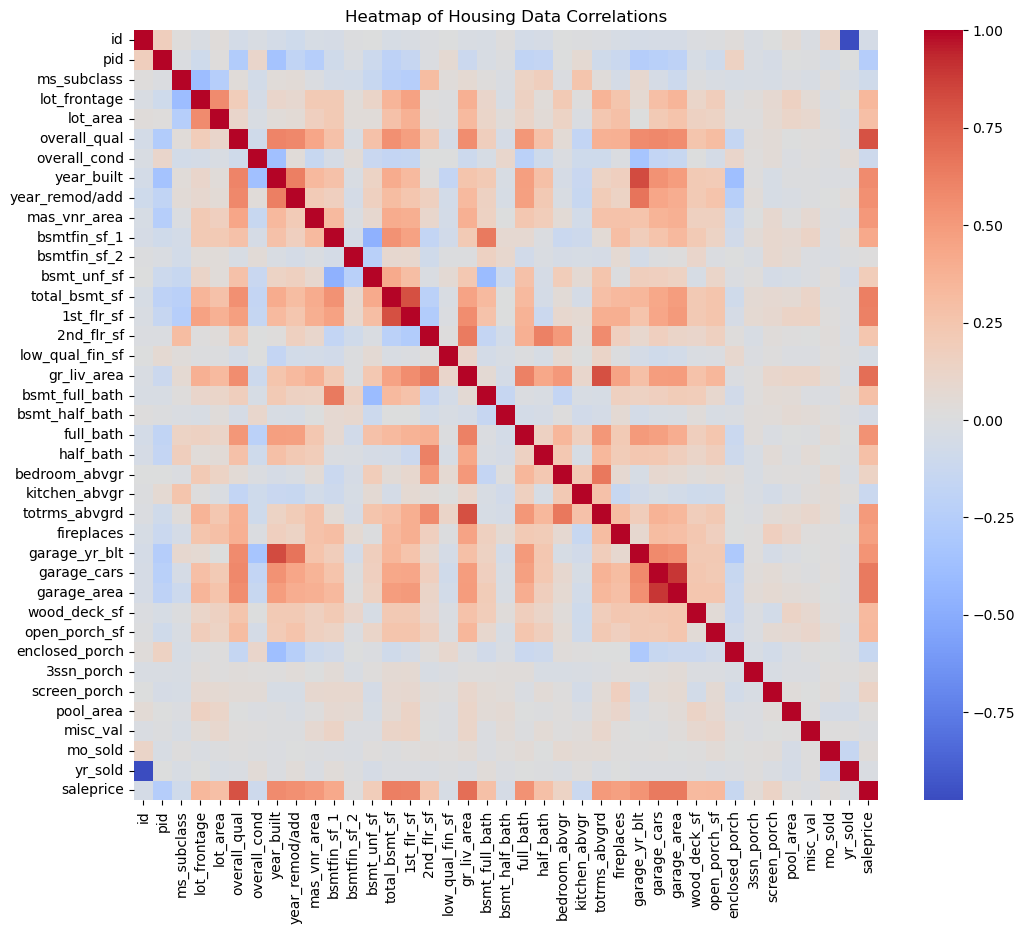

In [149]:
corr_matrix = train_numeric_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Housing Data Correlations')
plt.savefig('../images/corr_map.png', dpi=192);

In [150]:
train_corr_cols = train_numeric_cols[['gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'year_remod/add', 'garage_yr_blt']] 

In [151]:
test_corr_cols = test_numeric_cols[['gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'year_remod/add', 'garage_yr_blt']] 

In [152]:
train_cols_to_clean = pd.concat([train_corr_cols, train_sig_cat_cols], axis=1)

In [153]:
test_cols_to_clean = pd.concat([test_corr_cols, test_sig_cat_cols], axis=1)

In [154]:
train_cols_to_clean.head()

,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_remod/add,garage_yr_blt,land_slope,neighborhood,roof_matl,exter_qual,bsmtfin_type_2,saleprice
0,1479,475.0,2.0,725.0,725,2005,1976.0,Gtl,Sawyer,CompShg,Gd,Unf,130500
1,2122,559.0,2.0,913.0,913,1997,1997.0,Gtl,SawyerW,CompShg,Gd,Unf,220000
2,1057,246.0,1.0,1057.0,1057,2007,1953.0,Gtl,NAmes,CompShg,TA,Unf,109000
3,1444,400.0,2.0,384.0,744,2007,2007.0,Gtl,Timber,CompShg,TA,Unf,174000
4,1445,484.0,2.0,676.0,831,1993,1957.0,Gtl,SawyerW,CompShg,TA,Unf,138500


In [155]:
test_cols_to_clean.head()

,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_remod/add,garage_yr_blt,land_slope,neighborhood,roof_matl,exter_qual,bsmtfin_type_2
0,1928,440,1,1020,908,1950,1910.0,Gtl,OldTown,CompShg,TA,Unf
1,1967,580,2,1967,1967,1977,1977.0,Gtl,Sawyer,CompShg,TA,Unf
2,1496,426,2,654,664,2006,2006.0,Gtl,Gilbert,CompShg,Gd,Unf
3,968,480,2,968,968,2006,1935.0,Gtl,OldTown,CompShg,Gd,Unf
4,1394,514,2,1394,1394,1963,1963.0,Gtl,NAmes,CompShg,TA,Unf


In [156]:
train_cols_to_clean.describe()

,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_remod/add,garage_yr_blt,saleprice
count,2051.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,1937.000000,2051.000000
mean,1499.330083,473.671707,1.776585,1057.987805,1164.488055,1984.190151,1978.707796,181469.701609
std,500.447829,215.934561,0.764537,449.410704,396.446923,21.036250,25.441094,79258.659352
min,334.000000,0.000000,0.000000,0.000000,334.000000,1950.000000,1895.000000,12789.000000
25%,1129.000000,319.000000,1.000000,793.000000,879.500000,1964.500000,1961.000000,129825.000000
50%,1444.000000,480.000000,2.000000,994.500000,1093.000000,1993.000000,1980.000000,162500.000000
75%,1728.500000,576.000000,2.000000,1318.750000,1405.000000,2004.000000,2002.000000,214000.000000
max,5642.000000,1418.000000,5.000000,6110.000000,5095.000000,2010.000000,2207.000000,611657.000000


In [157]:
test_cols_to_clean.describe()

,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_remod/add,garage_yr_blt
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000
mean,1496.914579,470.362187,1.742597,1034.357631,1145.787016,1984.417995,1976.759904
std,506.468967,212.734075,0.750391,413.446291,375.264111,20.450725,25.689763
min,407.000000,0.000000,0.000000,0.000000,407.000000,1950.000000,1900.000000
25%,1114.000000,322.500000,1.000000,789.000000,864.000000,1967.000000,1960.000000
50%,1436.000000,473.000000,2.000000,975.000000,1063.000000,1992.000000,1978.000000
75%,1779.000000,576.000000,2.000000,1247.000000,1358.000000,2003.000000,2001.000000
max,4476.000000,1488.000000,4.000000,2630.000000,2674.000000,2010.000000,2010.000000


In [158]:
train_cols_to_clean.isna().sum()

gr_liv_area         0
garage_area         1
garage_cars         1
total_bsmt_sf       1
1st_flr_sf          0
year_remod/add      0
garage_yr_blt     114
land_slope          0
neighborhood        0
roof_matl           0
exter_qual          0
bsmtfin_type_2      0
saleprice           0
dtype: int64

In [159]:
test_cols_to_clean.isna().sum()

gr_liv_area        0
garage_area        0
garage_cars        0
total_bsmt_sf      0
1st_flr_sf         0
year_remod/add     0
garage_yr_blt     45
land_slope         0
neighborhood       0
roof_matl          0
exter_qual         0
bsmtfin_type_2     0
dtype: int64

I'll fill the missing values in my garage year built feature with the mean of each dataset

In [160]:
train_cols_to_clean.dtypes

gr_liv_area         int64
garage_area       float64
garage_cars       float64
total_bsmt_sf     float64
1st_flr_sf          int64
year_remod/add      int64
garage_yr_blt     float64
land_slope         object
neighborhood       object
roof_matl          object
exter_qual         object
bsmtfin_type_2     object
saleprice           int64
dtype: object

In [161]:
train_cols_to_clean['garage_yr_blt'] = train_cols_to_clean['garage_yr_blt'].fillna(train_cols_to_clean['garage_yr_blt'].mean())
train_cols_to_clean['garage_area'] = train_cols_to_clean['garage_area'].fillna(train_cols_to_clean['garage_area'].mean())
train_cols_to_clean['garage_cars'] = train_cols_to_clean['garage_cars'].fillna(train_cols_to_clean['garage_cars'].mean())
train_cols_to_clean['total_bsmt_sf'] = train_cols_to_clean['total_bsmt_sf'].fillna(train_cols_to_clean['total_bsmt_sf'].mean())

In [162]:
test_cols_to_clean['garage_yr_blt'] = test_cols_to_clean['garage_yr_blt'].fillna('1977')

In [163]:
train_cols_to_clean.isna().sum()

gr_liv_area       0
garage_area       0
garage_cars       0
total_bsmt_sf     0
1st_flr_sf        0
year_remod/add    0
garage_yr_blt     0
land_slope        0
neighborhood      0
roof_matl         0
exter_qual        0
bsmtfin_type_2    0
saleprice         0
dtype: int64

In [164]:
test_cols_to_clean.isna().sum()

gr_liv_area       0
garage_area       0
garage_cars       0
total_bsmt_sf     0
1st_flr_sf        0
year_remod/add    0
garage_yr_blt     0
land_slope        0
neighborhood      0
roof_matl         0
exter_qual        0
bsmtfin_type_2    0
dtype: int64

In [165]:
# correcting the outlier value in my garage year built feature which I believe to be 2007 and not 2207.
train_cols_to_clean['garage_yr_blt'] = train_cols_to_clean['garage_yr_blt'].replace(2207, 2007)

In [166]:
train_cols_to_clean.describe()

,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_remod/add,garage_yr_blt,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1499.330083,473.671707,1.776585,1057.987805,1164.488055,1984.190151,1978.610282,181469.701609
std,500.447829,215.881887,0.764351,449.301078,396.446923,21.036250,24.211852,79258.659352
min,334.000000,0.000000,0.000000,0.000000,334.000000,1950.000000,1895.000000,12789.000000
25%,1129.000000,319.000000,1.000000,793.000000,879.500000,1964.500000,1962.000000,129825.000000
50%,1444.000000,480.000000,2.000000,995.000000,1093.000000,1993.000000,1978.707796,162500.000000
75%,1728.500000,576.000000,2.000000,1318.500000,1405.000000,2004.000000,2001.000000,214000.000000
max,5642.000000,1418.000000,5.000000,6110.000000,5095.000000,2010.000000,2010.000000,611657.000000


In [167]:
train_cols_to_clean = pd.concat([train_cols_to_clean, first10train], axis=1)
test_cols_to_clean = pd.concat([test_cols_to_clean, first10test], axis=1)

In [168]:
train_cols_to_clean.to_csv('../datasets/train_cols_cleaned_02.csv', index=False)

In [169]:
test_cols_to_clean.to_csv('../datasets/test_cols_cleaned_02.csv', index=False)